<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ резюме из HeadHunter
   

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import gdown
import zipfile

# Загрузка данных

In [2]:
# Задаем имя для архива
archive_name = 'data_archive.zip'
archive_path = os.path.join(os.getcwd(), archive_name)

# Ссылка на файл на Google Drive
url = 'https://drive.google.com/uc?id=1bBsgY-0HVqCYKl3OFWRlFI2rAjBYaaZ-'

# Скачиваем архив, если он отсутствует
if not os.path.exists(archive_path):
    gdown.download(url, archive_path, quiet=False)

# Распаковываем архив в корневую папку проекта
with zipfile.ZipFile(archive_path, 'r') as zip_ref:
    zip_ref.extractall(os.getcwd())  # Распаковываем в корень проекта

# Удаляем архив после распаковки (если нужно)
os.remove(archive_path)

print(f"Архив '{archive_name}' успешно скачан и распакован в корневую папку проекта.")


Downloading...
From (original): https://drive.google.com/uc?id=1bBsgY-0HVqCYKl3OFWRlFI2rAjBYaaZ-
From (redirected): https://drive.google.com/uc?id=1bBsgY-0HVqCYKl3OFWRlFI2rAjBYaaZ-&confirm=t&uuid=6e9d9ac6-df6b-453e-8638-467521fa531c
To: /home/wanderer/Skillfactory_HW/Block_1/HeadHunterResumeAnalysis/data_archive.zip
100%|██████████| 66.1M/66.1M [00:01<00:00, 41.7MB/s]


Архив 'data_archive.zip' успешно скачан и распакован в корневую папку проекта.


# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [3]:
# Импортируем данные из csv-файлов в DataFrames

# Основной DF содержащий базу данных резюме
hh_data = pd.read_csv('data/dst-3.0_16_1_hh_database.csv', sep=(';'))

# DF для получения буквенных кодов и курса валют на нужную дату
exchange_data = pd.read_csv('data/ExchangeRates.csv')

2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [4]:
# Выводим 2 первые строки, для проверки
display(hh_data.head(2))

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,Неоконченное высшее образование 2000 Балтийск...,16.04.2019 15:59,Имеется собственный автомобиль
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",Высшее образование 1981 Военно-космическая ак...,12.04.2019 08:42,Не указано


3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

4. Обратите внимание на информацию о числе непустых значений.

In [5]:
# Отображаем общую информацию hh_data для первичного поиска пропусков
display(hh_data.info())

# Рассчитываем процент пропущенных значений в каждом столбце
nulls_percent = hh_data.isnull().mean() * 100

# Фильтруем столбцы, в которых есть пропущенные значения, и сортируем их по проценту пропущенных значений в порядке убывания
cols_with_nulls = nulls_percent[nulls_percent > 0].sort_values(ascending=False)

# Отображаем столбцы с пропущенными значениями и их процент
display(cols_with_nulls)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

None

Опыт работы                        0.375469
Последняя/нынешняя должность       0.004470
Последнее/нынешнее место работы    0.002235
dtype: float64

5. Выведите основную статистическую информацию о столбцах.


In [6]:
hh_data.describe()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
count,44744,44744,44744,44744,44744,44744,44576,44743,44742,44744,44744,44744
unique,16003,690,14929,10063,38,47,44413,30214,16927,40148,18838,2
top,"Мужчина , 32 года , родился 17 сентября 1986",50000 руб.,Системный администратор,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 10 лет 8 месяцев Апрель 2018 — по...,Индивидуальное предпринимательство / частная п...,Системный администратор,Высшее образование 2014 Московский технически...,07.05.2019 09:50,Не указано
freq,18,4064,3099,1261,30026,22727,3,935,2062,4,25,32268


# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [7]:
# Функция для извлечения уровня образования
def extract_education(education_info):
    """
    Функция принимает строку с информацией об уровне образования и возвращает уровень образования в нижнем регистре.
    
    Параметры:
    ----------
        Строка, содержащая информацию об уровне образования.
    
    Возвращаемое значение:
    ----------------------
        Уровень образования в нижнем регистре. 
    """
    
    # Разделяем строку на части и берем первые два элемента
    parts = education_info.split(' ', 2)[:2]
    
    # Получаем уровни образования согласно условию задачи
    if parts[1] == 'образование':
        return parts[0].lower()
    else:
        return ' '.join(parts).lower()


# Cоздание нового столбца 'Образование' с применением "extract_education"
hh_data['Образование'] = hh_data['Образование и ВУЗ'].apply(extract_education)

# Проверяем решение
display(hh_data['Образование'].unique())

# Удаление столбца "Образование и ВУЗ"
hh_data.drop(columns = ['Образование и ВУЗ'], inplace= True)

array(['неоконченное высшее', 'высшее', 'среднее специальное', 'среднее'],
      dtype=object)

2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [8]:
# Лямбда-функция для извлечения первого символа определяющего пол( "М" или "Ж")
extract_gender = lambda gender_info: gender_info.split(',', 1)[0][0]

# Лямбда-функция для извлечения возраста из строки
extract_age = lambda age_info: age_info.split(',', 2)[1].strip().split(' ')[0]

# Создание нового столбца 'Пол' с применением "extract_gender"
hh_data['Пол'] = hh_data['Пол, возраст'].apply(extract_gender)

#  Cоздание нового столбца 'Пол' с применением "extract_age"
hh_data['Возраст'] = hh_data['Пол, возраст'].apply(extract_age).astype(int)

# Отвечаем на вопросы
percent_female_resume = round(hh_data[hh_data['Пол'] == 'Ж'].shape[0] / hh_data['Пол'].shape[0] * 100, 2)
print(f'В базе данных {percent_female_resume}% женских резюме')

average_age = round(hh_data['Возраст'].mean(),1)
print(f'Средний возраст соискателей {average_age} лет')

# Удаляем столбец "Пол, возраст"
hh_data.drop(columns = ['Пол, возраст'], inplace= True)

В базе данных 19.07% женских резюме
Средний возраст соискателей 32.2 лет


3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [9]:
# Функция для преобразования стажа в количество месяцев
def extract_experience(experience_data):
    """
    Функция принимает строку с информацией о стаже работы и возвращает опыт работы в месяцах.
    
    Параметры:
    ----------
        Строка, содержащая информацию о стаже работы в формате "N лет M месяцев". Также может быть передано значение NaN.
    
    Возвращаемое значение:
    ----------------------
        Стаж работы в месяцах. Возвращает `None`, если входное значение — NaN.
    """
    
    # Проверяем и возвращаем None, если значение NaN или'Не указано'
    if pd.isna(experience_data) or experience_data in ('Не указано'):
        return None

    # Инициализируем значения лет и месяцев
    years = 0
    months = 0
    
    # Преобразуем в строку и разделяем на части
    experience_data = str(experience_data)
    parts = experience_data.split(' ',6)
    
    # Проходим по частям строки и извлекаем значения
    for i in range(len(parts)):
        if parts[i].isdigit():  # Проверяем, является ли элемент числом
            if i + 1 < len(parts):  # Проверяем, есть ли следующий элемент
                if parts[i + 1] in ['лет','года', 'год']:
                    years = int(parts[i])
                elif parts[i + 1] in ['месяцев', 'месяца', 'месяц']:
                    months = int(parts[i])
    
    total_months = years * 12 + months
    return total_months


# Создаём новый столбец "Опыт работы (месяц)"   
hh_data['Опыт работы (месяц)'] = hh_data['Опыт работы'].apply(extract_experience)

# Вывод медианного значения опыта работы в месяцах
median_experience = hh_data['Опыт работы (месяц)'].median()
print(f'Медианный опыт работы (в месяцах) в нашей таблице равен {median_experience}')

# Удаляем столбец "Опыт работы"
hh_data.drop(columns=['Опыт работы'], inplace= True)

Медианный опыт работы (в месяцах) в нашей таблице равен 100.0


4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [10]:
# Функция для получения города
def extract_city(city_info):
    """
    Функция для определения категории города.

    Параметры:
    ----------
        Строка, содержащая информацию о городе.

    Возвращаемое значение:
    ----------------------
        - Возвращает название города, если это Москва или Санкт-Петербург.
        - Возвращает 'город-миллионник', если город относится к списку крупнейших городов России с населением более миллиона человек.
        - Возвращает 'другие', если город не входит в указанные категории.
    """
    # Определяем список городов с населением более миллиона человек
    million_cities = ['Новосибирск', 'Екатеринбург', 'Нижний Новгород', 'Казань',
                      'Челябинск', 'Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж', 'Волгоград']

    # Извлекаем первую часть строки до запятой и удаляем лишние пробелы
    city_info = city_info.split(',', 1)[0].strip()

    # Проверяем, является ли город Москвой или Санкт-Петербургом
    if city_info in ['Москва', 'Санкт-Петербург']:
        return city_info
    # Проверяем, входит ли город в список городов-миллионников
    if city_info in million_cities:
        return 'город-миллионник'
    # Если город не попадает в указанные категории, возвращаем 'другие'
    else:
        return 'другие'
    
    
# Функция для получения информации о желании переехать
def extract_moving(moving_info):
    """
    Функция для определения готовности к переезду.

    Параметры:
    ----------
        Строка, содержащая информацию о готовности к переезду.
        
    Возвращаемое значение:
    ----------------------
        - Возвращает `False`, если в строке содержится информация о нежелании переезда
          (например, "не готов к переезду" или "не готова к переезду").
        - Возвращает `True` во всех остальных случаях, указывая на готовность к переезду.

    """
    # Определяем набор условий
    conditions = {
        'не готов к переезду',
        'не готова к переезду',
        'не хочу переехать'
    }
    
    # Преобразуем в строку, разделяем по запятым и очищаем от лишних пробелов
    parts = [part.strip() for part in str(moving_info).split(',')]
    
    # Проверяем наличие информации о нежелании переезда
    return not any(condition in parts for condition in conditions)


# Функция для получения инфомации о готовности к командировкам
def extract_business_trips(business_trip_info):
    """
    Функция для определения готовности к командировкам.

    Параметры:
    ----------
        Строка, содержащая информацию о готовности к командировкам.

    Возвращаемое значение:
    ----------------------
        - Возвращает `True`, если в строке содержится информация о готовности к командировкам 
          (например, "готов к командировкам", или "готова к редким командировкам").
        - Возвращает `False`, указывая на отсутствие готовности к командировкам.

    """
    conditions = {
        'готов к командировкам',
        'готова к командировкам',
        'готов к редким командировкам',
        'готова к редким командировкам'
    }
    
    # Преобразуем в строку, разделяем по запятым и очищаем пробелы
    parts = [part.strip() for part in str(business_trip_info).split(',')]
    
    # Проверяем наличие информации о нежелании командировок
    return any(condition in parts for condition in conditions)


# Создаём новые столбцы 'Город', 'Готовность к переезду', 'Готовность к командировкам'
hh_data['Город'] = hh_data['Город, переезд, командировки'].apply(extract_city)
hh_data['Готовность к переезду'] = hh_data['Город, переезд, командировки'].apply(extract_moving)
hh_data['Готовность к командировкам'] = hh_data['Город, переезд, командировки'].apply(extract_business_trips)

# Отвечаем на вопросы
spb_residents = round(hh_data[hh_data['Город'] == 'Санкт-Петербург'].shape[0] / hh_data['Город'].shape[0] *100)
print(f'Процент жителей Санкт-Петербурга, базе данных составляет - {spb_residents}%')

both_conditions = hh_data['Готовность к переезду'] & hh_data['Готовность к командировкам']
moving_and_trips = round((both_conditions.sum() / len(hh_data)) * 100)
print (f'Готовность одновременно к переезду и коммандировкам демонcтрирует  - {moving_and_trips}% соискателей')

# Удаляем столбец 'Город, переезд, командировки'
hh_data.drop(columns=['Город, переезд, командировки'], inplace= True)

Процент жителей Санкт-Петербурга, базе данных составляет - 11%
Готовность одновременно к переезду и коммандировкам демонcтрирует  - 32% соискателей


5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [11]:
# Функция для получения уникальных значения из столбца и добавления их в переданное множество.
def extract_unique_items(column_data, unique_values_set):
    """
    Параметры:
    ----------
        - Строка из текущей ячейки столбца.
        - Множество для хранения уникальных значений.
    
    Возвращает:
    -----------
    None
    """
    
    # Разделяем строку по запятым и пробелам, очищаем элементы от лишних пробелов и добавляем результат в множество
    parts = [part.strip() for part in str(column_data).split(', ')]
    unique_values_set.update(parts)
    return None


# Функция для создания признаков мигалок
def flashing_light(df, column_name, unique_values):
    """
    Добавляет в датафрейм столбцы, показывающие наличие каждого элемента из unique_values в значениях столбца column_name.

    Параметры:
    ----------
        - Датафрейм, в который будут добавлены новые столбцы.
        - Название столбца, в котором производится поиск элементов.
        - Множество уникальных значений, которые нужно искать в столбце column_name.

    Возвращает:
    -----------
        Обновленный датафрейм с новыми заполненными (True или False) столбцами.
    """
    for value in unique_values:
        # Создаем новый столбец с именем по шаблону 'column_name_value' и заполняем его True/False
        df[f'{value}'] = df[column_name].apply(lambda x: value in x.split(', '))
    return df


# Создаем набор уникальных вариантов для графика работы
unique_graphics = set()
hh_data['График'].apply(lambda x: extract_unique_items(x, unique_graphics))

# Создаем набор уникальных вариантов для типа занятости
unique_employment = set()
hh_data['Занятость'].apply(lambda x: extract_unique_items(x, unique_employment))

# Создаем признаки мигалки для 'График'
hh_data = flashing_light(hh_data, 'График', unique_graphics)

# Создаем признаки мигалки для 'Занятость'
hh_data =flashing_light(hh_data, 'Занятость', unique_employment)

# Ответы на вопросы
project_and_volunteering = hh_data[hh_data['волонтерство']& hh_data['проектная работа']].shape[0]
print(f'{project_and_volunteering} - людей ищут проектную работу и волонтёрство (в обоих столбцах стоит True)')

shift_and_flexible = hh_data[hh_data['вахтовый метод'] & hh_data['гибкий график']].shape[0]
print(f'{shift_and_flexible} - людей хотят работать вахтовым методом и с гибким графиком (в обоих столбцах стоит True)')

# Удаление столбцов 'График' и 'Занятость'
hh_data.drop(columns=['График', 'Занятость'], inplace= True)

436 - людей ищут проектную работу и волонтёрство (в обоих столбцах стоит True)
2311 - людей хотят работать вахтовым методом и с гибким графиком (в обоих столбцах стоит True)


6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [12]:
# Функция для получения множества типов валюты
def extract_unique_curency_type(currency_info, unique_currency_type_set):
    """
    Извлекает уникальные типы валют из переданной строки и добавляет их в множество.

    Параметры:
        - строка с информацией о зарплате и валюте
        - множество для хранения уникальных типов валют
    
    Возвращает:
        None
    """
    parts = [part.strip() for part in str(currency_info).split(' ')]

    # Ищем валюту в строке
    for part in parts:
        # Проверяем, если часть строки не является числом, добавляем её в множество
        if not part.isnumeric():
            unique_currency_type_set.add(part)
    return None

# Функция для извлечения числовой части ЗП
def extract_salary(salary_info):
    """
    Извлекает числовую часть из строки зарплаты, предполагая, что это значение зарплаты.

    Параметры:
        строка с информацией о зарплате и валюте
    
    Возвращает:
        числовое значение зарплаты или None, если число не найдено
    """
    parts = [part.strip() for part in str(salary_info).split(' ')]

    # Ищем и возвращаем числовую часть
    for part in parts:
        if part.isnumeric():
            return part   
    return None # Возвращаем None, если числовая часть не найдена

# Функция для получения типа валюты, в которой указана ЗП
def extract_currency(salary_info):
    """
    Извлекает код валюты из строки зарплаты по словарю соответствий.

    Параметры:
        строка с информацией о зарплате и валюте
    
    Возвращает:
        код валюты или None, если валюта не найдена
    """
    parts = [part.strip() for part in str(salary_info).split(' ')]

    # Ищем валюту
    for part in parts:
        if part in currency_codes:
            return currency_codes[part]  # Возвращаем соответствующий код валюты
    return None  # Возвращаем None, если валюта не найдена


# Преобразование столбца exchange_data['date'] в формат datetime (только дата)
exchange_data['date'] = pd.to_datetime(exchange_data['date'], format='%d/%m/%y', errors='coerce').dt.date

# Преобразование столбца hh_data['Обновление резюме'] в формат datetime (только дата)
hh_data['Обновление резюме'] = pd.to_datetime(hh_data['Обновление резюме'], format='%d.%m.%Y %H:%M', dayfirst=True, errors='coerce').dt.date

# Удаление ненужных столбцов из exchange_data
exchange_data.drop(columns=['per', 'time', 'vol'], inplace=True)

# Извлечение уникальных типов валют
unique_curency_type_set = set()
hh_data['ЗП'].apply(lambda x: extract_unique_curency_type(x, unique_curency_type_set))


# Словарь для сопоставления типов валют с буквенными кодами ISO 4217
currency_codes = {
    'грн.': 'UAH',
    'USD': 'USD',
    'EUR': 'EUR',
    'бел.руб.': 'BYN',
    'KGS': 'KGS',
    'сум': 'UZS',
    'AZN': 'AZN',
    'KZT': 'KZT',
    'руб.': 'RUB'
}

# Извлечение числовой части ЗП 
hh_data['salary'] = hh_data['ЗП'].apply(extract_salary).astype(float)

# Получение типа валюты согласно кодам ISO 4217
hh_data['currency'] = hh_data['ЗП'].apply(extract_currency).astype(str)

# Объединение DataFrames по дате и валюте
hh_data = hh_data.merge(
    exchange_data,
    left_on=['Обновление резюме', 'currency'],  # Столбцы из hh_data
    right_on=['date', 'currency'],  # Столбцы из exchange_data
    how='left'
)

# Замена значений в 'close' и 'proportion' на 1, если они являются NaN
hh_data['close'] = hh_data.apply(lambda row: 1 if pd.isna(row['close']) else row['close'], axis=1)
hh_data['proportion'] = hh_data.apply(lambda row: 1 if pd.isna(row['proportion']) else row['proportion'], axis=1)

# Отвечаем на вопрос
hh_data['ЗП(руб)'] = hh_data['salary'] * hh_data['close'] / hh_data['proportion']
median_salary = round(hh_data['ЗП(руб)'].median())
print(f'Желаемая медианная заработная плата соискателей в нашей таблице (в рублях) составляет - {median_salary}')

# Удаление ненужных столбцов
hh_data.drop(columns=['ЗП', 'salary', 'currency', 'date', 'close', 'proportion'], inplace=True)


Желаемая медианная заработная плата соискателей в нашей таблице (в рублях) составляет - 59019


In [13]:
# Сверка
hh_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Ищет работу на должность:        44744 non-null  object 
 1   Последнее/нынешнее место работы  44743 non-null  object 
 2   Последняя/нынешняя должность     44742 non-null  object 
 3   Обновление резюме                44744 non-null  object 
 4   Авто                             44744 non-null  object 
 5   Образование                      44744 non-null  object 
 6   Пол                              44744 non-null  object 
 7   Возраст                          44744 non-null  int64  
 8   Опыт работы (месяц)              44574 non-null  float64
 9   Город                            44744 non-null  object 
 10  Готовность к переезду            44744 non-null  bool   
 11  Готовность к командировкам       44744 non-null  bool   
 12  вахтовый метод    

# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

In [14]:
# Создание подграфиков
fig = make_subplots(
    rows=1, cols=2,  # 1 ряд и 2 столбца
    column_widths=[0.6, 0.4]  # Пропорции ширины столбцов
)

# Создание гистограммы
histogram_fig = px.histogram(hh_data, x='Возраст')

# Добавление гистограммы в первый подграфик
for trace in histogram_fig.data:
    fig.add_trace(trace, row=1, col=1)

# Создание коробчатой диаграммы
box_fig = px.box(hh_data, x='Возраст', orientation='h')

# Добавление коробчатой диаграммы во второй подграфик
for trace in box_fig.data:
    fig.add_trace(trace, row=1, col=2)

# Обновление макета
fig.update_layout(
    title= 'Анализ распределения возраста соискателей',
    width=1500,
    height=600, 
    title_x=0.5,
    xaxis_title='Возраст соискателей',
    yaxis_title='Количество резюме',
    xaxis2_title='Возраст соискателей',
    yaxis2_title='Все резюме в базе данных'
 
)

fig.write_image('images/age_distribution.png')


![age_distribution](images/age_distribution.png)

1. Мода распределения показывает, что в базе резюме 2834 соискателя в возрасте 30 лет.
2. В базе резюме наибольшее количество соискателей сосредоточено в диапазоне от 27 до 36 лет. Медианное значение 31.
3. С учетом распределения соискателей по возрасту значения выше 60 лет можно отнести к выбросам. Явной аномалией является наличие в базе соискателя в возрасте 100 лет.

**Общий вывод:** большинство соискателей находится в молодом возрасте из чего можно сделать вывод, что рынок труда привлекает/доступен для более молодых возрастных групп.

---

2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

In [15]:
# Создание подграфиков гистаграмма и коробчатой диаграммы
fig = make_subplots(
    rows=1, cols=2,  # 1 ряд и 2 столбца
    column_widths=[0.6, 0.4]  # Пропорции ширины столбцов
)

# Создание гистограммы
histogram_fig = px.histogram(hh_data, x='Опыт работы (месяц)')

# Добавление гистограммы в первый подграфик
for trace in histogram_fig.data:
    fig.add_trace(trace, row=1, col=1)

# Создание коробчатой диаграммы
box_fig = px.box(hh_data, x='Опыт работы (месяц)', orientation='h')

# Добавление коробчатой диаграммы во второй подграфик
for trace in box_fig.data:
    fig.add_trace(trace, row=1, col=2)

# Обновление макета
fig.update_layout(
    title='Анализ распределения опыта работы соискателей',  # Общее название для подграфиков
    title_x=0.5,  # Центрирование заголовка
    width=1500,
    height=600
)

# Обновление осей первого подграфика
fig.update_xaxes(title_text='Опыт работы в месяцах', row=1, col=1)
fig.update_yaxes(title_text='Количество резюме', row=1, col=1)

# Обновление осей второго подграфика
fig.update_xaxes(title_text='Опыт работы в месяцах', row=1, col=2)
fig.update_yaxes(title_text='Все резюме в базе данных', row=1, col=2)




# Построение диаграммы рассеяния для анализа корреляции возраста и стажа
fig_2 = px.scatter(hh_data, 
                 x='Возраст',  # Ось X — возраст соискателя
                 y='Опыт работы (месяц)',  # Ось Y — стаж (опыт работы в месяцах)
                 title='Корреляция возраста и стажа работы')

# Настройка осей и отображение
fig_2.update_layout(
    xaxis_title='Возраст соискателей (лет)',
    yaxis_title='Стаж работы (в месяцах)',
    title_x=0.5,
    width=1500,
    height=600
    
)

# вывод графиков
fig.write_image('images/experience_distribution.png')
fig_2.write_image('images/experience_distribution_scatter.png')

![experience_distribution](images/experience_distribution.png)
![experience_distribution_scatter](images/experience_distribution_scatter.png)

1. Мода распределения равна 81.
2. Графики показывают, что у большинства соискателей опыт работы находится в диапазоне от 57 до 154 месяцев. Медиана равна 100.
3. Поскольку по первым двум графикам видно большое количество выбросов, но сложно однозначно оценить являются ли эти выбросы аномалиями, я добавил диаграмму рассеивания для анализа корреляции возраста и стажа работы.

**Выводы:**

1. Из диаграммы рассеивания видно, что существует явная зависимость между возрастом соискателей и стажем работы (что и так было очевидно, но мы ищем аномалии...)
2. То что мы видим как "аномалии" в стаже работы на коробчатой диаграме, является нормальным показателем для соискателей из разных возрастных групп.
3. Подтверждается вывод из задания 4.1 о том, что имеет смысл анализировать только те резюме, в которых возраст соискателей не превышает 60 лет.
4. Также на диаграмме рассеисания видны отдельные точки (большой стаж у молодых людей или высокий возраст с маленьким стажем), которые и являются аномалиями поскольку сильно отличаются от общей массы показателей.
5. Нельзя "в лоб" анализировать отдельные показатели.

---

3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака возраста? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


In [16]:
# Создание графиков гистограмма и коробчатая диаграмма
fig = make_subplots(
    rows=1, cols=2,  # 1 ряд и 2 столбца
    column_widths=[0.6, 0.4]  # Пропорции ширины столбцов (первый шире второго)
)

# Создание гистограммы для отображения распределения желаемой ЗП (руб)
histogram_fig = px.histogram(hh_data, x='ЗП(руб)')

# Добавление каждого трейсера (линии/столбца) гистограммы в первый подграфик
for trace in histogram_fig.data:
    fig.add_trace(trace, row=1, col=1)

# Создание коробчатой диаграммы для анализа распределения ЗП (руб) по категориям
box_fig = px.box(hh_data, x='ЗП(руб)', orientation='h')  # Горизонтальная ориентация

# Добавление каждого трейсера коробчатой диаграммы во второй подграфик
for trace in box_fig.data:
    fig.add_trace(trace, row=1, col=2)

# Обновление макета с указанием заголовков для обоих подграфиков
fig.update_layout(
    title='Анализ распределения желаемой заработной платы соискателей',  # Основной заголовок
    title_x=0.5,
    width=1500,
    height=600,
    xaxis_title='Желаемая ЗП (руб)',
    yaxis_title='Количество резюме',
    xaxis2_title='Желаемая ЗП (руб)',
    yaxis2_title='Все резюме в базе данных',
)


# Создание двух диаграмм рассеивания для зависимостей между желаемой ЗП(руб), возрастом и стажем работы
fig_2 = make_subplots(
    rows=1, cols=2,  # 1 ряд и 2 столбца
    column_widths=[0.6, 0.4]  # Пропорции ширины столбцов
)

# Создание диаграммы рассеяния для анализа корреляции возраста соискателей и желаемой ЗП
age_and_salary = px.scatter(hh_data, 
                 x='Возраст',  # Ось X — возраст соискателя
                 y='ЗП(руб)'  # Ось Y — желаемая заработная плата
)

# Добавление диаграммы рассеяния в первый подграфик
for trace in age_and_salary.data:
    fig_2.add_trace(trace, row=1, col=1)

# Создание диаграммы рассеяния для анализа корреляции стажа работы и желаемой ЗП
experience_and_salary = px.scatter(hh_data,
                        x='Опыт работы (месяц)',  # Ось X — стаж работы (в месяцах)
                        y='ЗП(руб)'  # Ось Y — желаемая заработная плата
)

# Добавление диаграммы рассеяния во второй подграфик
for trace in experience_and_salary.data:
    fig_2.add_trace(trace, row=1, col=2)

# Обновление макета для второго графика
fig_2.update_layout(
    title='Анализ корреляции желаемой ЗП с возрастом и стажем работы',
    title_x=0.5,
    width=1500,
    height=600,
    xaxis_title='Возраст соискателей',
    yaxis_title='Желаемая ЗП(руб)',
    xaxis2_title='Стаж работы соискателей(в месяцах)',
    yaxis2_title='Желаемая ЗП(руб)',
)


# Вывод графиков
fig.write_image('images/salary_distribution.png')
fig_2.write_image('images/salary_distribtion_scatters.png')

# Анализ анкет с желаемой ЗП(руб) > 400000тыс.руб.
df_filtered_sorted = hh_data[hh_data['ЗП(руб)'] >= 400000].sort_values(by='ЗП(руб)', ascending=False)
display(df_filtered_sorted.head())

# Количество уникальных значений по полю 'Ищет работу на должность:'
unique_value = (hh_data['Ищет работу на должность:'].nunique())
print(f'Количество уникальных значений по полю "Ищет работу на должность" - {unique_value}')

# Ответ на вопрос
mode_salary = hh_data['ЗП(руб)'].mode()[0]
print(f'Мода распределения равна - {mode_salary}')

,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),Город,...,удаленная работа,полный день,сменный график,гибкий график,стажировка,волонтерство,проектная работа,частичная занятость,полная занятость,ЗП(руб)
6931,"Программирование, Разработка или Системный адм...","Евразийский банк, АО",Главный специалист Отдел разработки систем роз...,2019-04-22,Не указано,высшее,М,31,115.0,другие,...,True,True,True,True,False,False,True,True,True,24304876.0
39191,Специалист по IT,"ТОО ""AMS""",Системный администратор,2019-04-22,Не указано,среднее специальное,М,29,98.0,другие,...,False,True,False,False,False,False,False,False,True,7675224.0
28253,"Руководитель IT проектов, Роботизация, Автомат...",HAMSTER ROBOTICS,Заместитель директора,2019-04-27,Имеется собственный автомобиль,высшее,М,39,280.0,Москва,...,True,True,False,True,False,False,True,True,True,3000000.0
43134,Chief AI Officer,Finnish Russian Univeristy Cooperation in Tele...,Project Manager in Multimedia Technologies,2018-10-25,Не указано,высшее,М,38,97.0,Москва,...,False,True,False,False,False,False,False,False,True,2500000.0
41924,Project manager,Тинькофф Банк,Технолог автоматизации бизнес-процессов,2019-04-22,Не указано,неоконченное высшее,М,24,39.0,Москва,...,True,True,False,True,False,False,True,True,True,1750000.0


Количество уникальных значений по полю "Ищет работу на должность" - 14929
Мода распределения равна - 50000.0


![salary_distribution](images/salary_distribution.png)
![salary_distribution_scatters](images/salary_distribtion_scatters.png)

1. Мода распределения составляет 50 тыс. руб.
2. Желательная зарплата (руб.) большинства соискателей находится в пределах от 37 тыс. руб. до 95 тыс. руб. Медиана равна 59 тыс. руб.
3. Для оценки выбросов я дополнительно построил две диаграммы рассеивания.

**Выводы:**

1. На всех графиках видны точки, которые являются аномалиями. То, что эти точки являются аномалиями, было дополнительно проверено с помощью фильтрации.
2. На графике ЗП/Возраст явно видны три пика, связанные с ростом желаемой зарплаты с периодичностью 27, 32 и 37 лет, после которых происходит «отрезвление».
3. На графике Стаж/ЗП видно, что наиболее высокие ожидания по зарплате у соискателей со стажем в диапазоне от ~ 9 до 16 лет.
4. По моему мнению, необходимо проверить зависимость желаемой зарплаты от уровня и сложности позиции, на которую претендует соискатель. В связке с возрастом квалификацией и опытом работы это будет наиболее точным методом определения аномалий. Но на данном этапе это проблематично, поскольку в базе резюме содержится ~ 15 тыс. уникальных вариантов должностей, на которые претендуют соискатели.
5. Необходимо лучше структурировать базу данных по категориям (отрасль, тип позиции), это сделает анализ в будущем более точным.

---


4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

In [17]:
# Фильтрация данных по зарплате меньше 1 миллиона
filtered_salary = hh_data[hh_data['ЗП(руб)'] < 1000000]

# Вычисление медианы зарплаты для каждого уровня образования и преобразование Series в DF.
education_level_median_salary = filtered_salary.groupby('Образование')['ЗП(руб)'].median().sort_values().reset_index()

# Построение столбчатой диаграммы
fig = px.bar(education_level_median_salary, 
             x='Образование',  # Ось X — уровень образования
             y='ЗП(руб)',  # Ось Y — медианная заработная плата
             title='Медианная заработная плата по уровню образования'
)

# Настройка макета
fig.update_layout(
    xaxis_title='Уровень образования',
    yaxis_title='Медианная ЗП (руб)',
    title_x=0.5,
    width=1500,
    height=600,
    xaxis_tickangle=-45
)

# Отображение графика
fig.write_image('images/education_level_and_median_salary.png')


![education_level_and_median_salary](images/education_level_and_median_salary.png)

1. Наибольший уровень желаемой заработной платы наблюдается у соискателей с высшим образованием. Наименьший — у соискателей со средним и средним специальным образованием.
2. Факт того, что у людей с высшим образованием уровень желаемой заработной платы будет выше, чем у соискателей из других категорий, очевиден и без данного графика. С другой стороны, данный график показывает полуторакратную разницу в ожиданиях между соискателями со средним/средним специальным и высшим образованием. Поэтому, если компания решит, в целях экономии, нанимать на сложные позиции соискателей с более низким уровнем образования, или примет решение, что независимо от позиции они будут нанимать только людей с высшим образованием, данная информация будет для них полезной при планировании/оценке размера фонда заработной платы компании. В любом случае не стоит забывать, что кроме уровня образования, более решающими факторами могут оказаться опыт и квалификация соискателя и оценивать пожелания по заработной плате без их учета, не корректно. Поэтому, как я уже писал выше, этот показатель имеет смысл оценивать только в связке с другими факторами.

---


5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

In [18]:
# Фильтрация данных по зарплате меньше 1 миллиона
filtered_salary = hh_data[hh_data['ЗП(руб)'] < 1000000]

# Расчёт медианных зарплат по городам
median_salaries = filtered_salary.groupby('Город')['ЗП(руб)'].median()

# Расчёт размаха зарплат по городам
salary_range = filtered_salary.groupby('Город')['ЗП(руб)'].apply(lambda x: x.max() - x.min())

# Создание итогового DataFrame с медианными зарплатами и размахом зарплат
summary_df = pd.DataFrame({
    'Город': median_salaries.index,
    'Медианная_зарплата': median_salaries.values,
    'Размах_зарплат': salary_range.values
}).reset_index()

# Визуализация
fig = px.scatter(summary_df, x='Медианная_зарплата', y='Размах_зарплат',
                 size='Размах_зарплат',  # Размер точки по размаху зарплат
                 text='Город',  # Добавление названий городов
                 title='Соотношение медианной зарплаты и размаха по городам')

fig.update_layout(
    title_x=0.5,
    xaxis_title='Медианная заработная плата (руб)',
    yaxis_title='Размах зарплат (руб)',
    width=1350,
    height=600,
    showlegend=False  # Скрыть легенду, чтобы не мешала
)

fig.update_traces(textposition='top center')  # Позиция текста на графике


# Фильтрация данных по разным категориям городов из уже отфильтрованных данных
moscow = filtered_salary[filtered_salary['Город'] == 'Москва']
spb = filtered_salary[filtered_salary['Город'] == 'Санкт-Петербург']
million = filtered_salary[filtered_salary['Город'] == 'город-миллионник']
other = filtered_salary[filtered_salary['Город'] == 'другие']

# Построение графика boxplot для Москвы
fig_moscow = px.box(moscow, 
                    x='ЗП(руб)', 
                    y='Город', 
                    orientation='h',
                    title='Распределение заработных плат в Москве')

# Настройка макета
fig_moscow.update_layout(
    yaxis_title='',
    yaxis=dict(
        tickangle=-90  # Поворот меток оси Y на 90 градусов
    ),
    title_x=0.5,
    width=1350,
    height=600
)

# Построение графика boxplot для Санкт-Петербурга
fig_spb = px.box(spb, 
                 x='ЗП(руб)', 
                 y='Город', 
                 orientation='h',
                 title='Распределение заработных плат в Санкт-Петербурге')

# Настройка макета
fig_spb.update_layout(
    yaxis_title='',
    yaxis=dict(
        tickangle=-90
    ),
    title_x=0.5,
    width=1350,
    height=600
)

# Построение графика boxplot для городов-миллионников
fig_million = px.box(million, 
                     x='ЗП(руб)', 
                     y='Город', 
                     orientation='h',
                     title='Распределение заработных плат в городах-миллионниках')

# Настройка макета
fig_million.update_layout(
    yaxis_title='',
    yaxis=dict(
        tickangle=-90
    ),
    title_x=0.5,
    width=1350,
    height=600
)

# Построение графика boxplot для других городов
fig_other = px.box(other, 
                   x='ЗП(руб)', 
                   y='Город', 
                   orientation='h',
                   title='Распределение заработных плат в других городах')

# Настройка макета
fig_other.update_layout(
    yaxis_title='',
    yaxis=dict(
        tickangle=-90
    ),
    title_x=0.5,
    width=1350,
    height=600
)

# Отображение графиков
fig.write_image('images/range_of_salaries.png')
fig_moscow.write_image('images/range_of_salaries_moscow.png')
fig_spb.write_image('images/range_of_salaries_spb.png')
fig_million.write_image('images/range_of_salaries_million.png')
fig_other.write_image('images/range_of_salaries_other.png')

# Отвечаем на вопрос
max_salary_value = filtered_salary['ЗП(руб)'].max()
city_with_max_salary = filtered_salary[filtered_salary['ЗП(руб)'] == max_salary_value]['Город'].values[0]
print(f"Город с наибольшей желаемой зарплатой: {city_with_max_salary}, ЗП: {max_salary_value} руб.")



Город с наибольшей желаемой зарплатой: другие, ЗП: 923983.0 руб.


![range_of_salaries](images/range_of_salaries.png)
![range_of_salaries_moscow](images/range_of_salaries_moscow.png)
![range_of_salaries_spb](images/range_of_salaries_spb.png)
![range_of_salaries_million](images/range_of_salaries_million.png)
![range_of_salaries_other](images/range_of_salaries_other.png)

1. Если бы не категория "другие", можно было бы утверждать, что медианный уровень желаемой заработной платы и размах ожиданий выше в крупных городах. Однако после анализа каждой категории городов отдельно видно, что у соискателей из категории "другие" есть проблема с оценкой своих возможностей. При относительно низкой медианной заработной плате, размах ожиданий очень велик. Это выражается в большом количестве кандидатов, претендующих на заработок в 200 тыс. руб. и более, а также в ряде аномалий. Картина становится более реальной, если использовать для анализа резюме, где желаемая заработная плата составляет менее 300 тыс. руб.
2. Я считаю, что признак города важен при прогнозировании заработной платы, но для этого необходимо предварительно проанализировать и очистить данные от аномалий.

---

6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

In [19]:
# Рассчитываем медианную зарплату по каждому признаку
grouped_relocation = hh_data.groupby('Готовность к переезду').agg({'ЗП(руб)': 'median'}).reset_index()
grouped_business_trip = hh_data.groupby('Готовность к командировкам').agg({'ЗП(руб)': 'median'}).reset_index()

# Добавляем категорию для каждого столбца
grouped_relocation['Категория'] = 'Готовность к переезду'
grouped_business_trip['Категория'] = 'Готовность к командировкам'

# Переименовываем столбцы для корректного объединения
grouped_relocation = grouped_relocation.rename(columns={'Готовность к переезду': 'Статус'})
grouped_business_trip = grouped_business_trip.rename(columns={'Готовность к командировкам': 'Статус'})

# Объединяем две таблицы
combined = pd.concat([grouped_relocation, grouped_business_trip])

# Округляем зарплату для графика
combined['ЗП(руб)'] = combined['ЗП(руб)'].round()

# Выводим таблицу для проверки
display(combined)

# Строим столбчатую диаграмму
fig = px.bar(
    combined,
    x='Категория', # Категории: Переезд и Командировки
    y='ЗП(руб)', # Медианная зарплата
    color='Статус', # Цвет для True/False (Да/Нет)
    barmode='group', # Группированные столбцы
    text='ЗП(руб)', # Подписи значений зарплаты
    title='Медианная зарплата по готовности к переезду и к командировкам'
)

# Настройка внешнего вида
fig.update_layout(
    xaxis_title='',
    yaxis_title='Медианная зарплата (руб)',
    legend_title='Статус',
    title_x=0.5,
    width=1350,
    height=600
)

# Отображаем график
fig.write_image('images/salary_relocation_business_trip.png')


# Отвечаем на вопрос
# Фильтруем данные по готовности и к переезду, и к командировкам
filtered_data = hh_data[(hh_data['Готовность к переезду'] == True) & (hh_data['Готовность к командировкам'] == True)]

# Рассчитываем медианную зарплату
median_salary = filtered_data['ЗП(руб)'].median()

# Округляем до целого числа и преобразуем в тысячи
median_salary_thousands = round(median_salary / 1000)
print(f'Желаемая медианная заработная плата соискателей, готовых и к переезду, и к командировкам равна {median_salary_thousands} тыс.руб.')



,Статус,ЗП(руб),Категория
0,False,50000.0,Готовность к переезду
1,True,64327.0,Готовность к переезду
0,False,40000.0,Готовность к командировкам
1,True,65000.0,Готовность к командировкам


Желаемая медианная заработная плата соискателей, готовых и к переезду, и к командировкам равна 66 тыс.руб.


![salary_relocation_business_trip](images/salary_relocation_business_trip.png)

Сравнение желаемой заработной платы по категориям, показывает, что соискатели готовые к переезду и к командировкам претендуют на более высокую заработную плату

---

7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

In [20]:
# Создание сводной таблицы
pivot_table = hh_data.pivot_table(
    values='ЗП(руб)',        # Значения для агрегирования
    index='Образование',     # Индексы - образование
    columns='Возраст',       # Колонки - возраст
    aggfunc='median',        # Агрегируем медианные значения
    fill_value=0             # Заполняем нулями отсутствующие значения
)


# Построение тепловой карты с использованием plotly.express
fig = px.imshow(
    pivot_table,
    labels=dict(x="Возраст", y="Образование", color="Медианная ЗП (руб)"),
    title="Тепловая карта медианной заработной платы по возрасту и образованию",
    aspect="auto"
)

# Настройка внешнего вида
fig.update_layout(
    title_x=0.5,
    width=1500,
    height=600
)

# Отображение графика
fig.write_image('images/age_education_and_median_salary.png')


![age_education_and_median_salary](images/age_education_and_median_salary.png)

**Выводы:**

1.  ***Категория "высшее":***
    * Соискатели дольше остальных находятся на рынке труда.
    * У данной категории самый высокий уровень по желаемой заработной плате.
    * Данная категория дольше других удерживает высокий уровень дохода.
    * Пик карьеры (и ожиданий по заработной пллате), приходится на ~40 лет.
    * На диаграмме также заметно нестандартное поведение в 59, 69 и после 76 лет.
2. ***Категория "неоконченное высшее":***
    * У категории "неоконченное высшее" наблюдается повышенная волатильность по ожидаемым зарплатам.
    * Пик ожиданий приходится ~ 43 года
3. ***Категория "среднее":***
    * Соискатели выходят на пик своих ожиданий примерно к ~34 годам.
    * После 34 лет доход данной групы не стабилен
    * Данная категория, раньше других уходит с рынка
4. ***Категория "среднее специальное":***
    * Данная категория раньше других выходит на рынок труда.
    * Пик ожиданий соискатели демонтрируют в возрасте ~45 лет.
    * В целом это наиболее стабильная категория, без резких колебаний по ожиданиям на протяжении всей трудовой деятельности.

    ---

8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

In [21]:
# Переводим опыт работы из месяцев в годы
experience_in_years = round(hh_data['Опыт работы (месяц)'] / 12,2)

# Строим диаграмму рассеяния
fig = px.scatter(
    hh_data,
    x='Возраст',
    y=experience_in_years,
    title='Зависимость опыта работы от возраста соискателя',
    size_max=10   # Максимальный размер точек
)

# Добавляем красную линию на график, соединяющую точки (0, 0) и (100, 100)
fig.add_shape(
    type="line",
    x0=0, y0=0,
    x1=100, y1=100,
    line=dict(color='red', width=1),
)

# Настраиваем внешний вид графика: добавляем подпись для оси X и центрируем заголовок
fig.update_layout(
    xaxis_title='Возраст (лет)',
    yaxis_title='Опыт работы (месяц)', 
    title_x=0.5,
    width=1500,
    height=600
)

# Отображаем готовый график
fig.write_image('images/experience_age_scatter.png')

# Фильтруем данные, чтобы выбрать только те строки, где опыт работы больше возраста
points_above_line = experience_in_years > hh_data['Возраст']

# Выводим количество точек, которые лежат выше красной линии
print(f"Количество точек, лежащих выше прямой: {points_above_line.sum()}")


Количество точек, лежащих выше прямой: 7


![experience_age_scatter](images/experience_age_scatter.png)

Проводить сквозной анализ через все возраста для выявления аномалий некорректно, так как недостаточно критериев для точного определения, что является аномалией в каждом конкретном случае. Например, приемлемое соотношение стаж/возраст: для 60-летнего человека стаж 2/3 может быть нормальным показателем, тогда как для 20-летнего это уже может быть аномалией. Использование одного параметра — "опыт работы равен возрасту" — недостаточно для качественной очистки данных.

---

# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [22]:
# Выводим количество найденных дубликатов
print(f'Найдено {hh_data.duplicated().sum()} копий')

# Удаляем дубликаты, сохраняя первое вхождение
hh_data = hh_data.drop_duplicates(keep='first')

Найдено 161 копий


2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [23]:
# Подсчёт числа пропусков в каждом столбце
cols_with_nulls = hh_data.isnull().sum()

# Сортировка столбцов с пропусками
sorted_cols_with_nulls = cols_with_nulls[cols_with_nulls > 0].sort_values(ascending=False)

# Отображение результата
display(sorted_cols_with_nulls)


Опыт работы (месяц)                168
Последняя/нынешняя должность         2
Последнее/нынешнее место работы      1
dtype: int64

3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [24]:
# Удаляем строки, где в столбце «Последняя/нынешняя должность» есть пропуски
hh_data = hh_data.dropna(subset=['Последняя/нынешняя должность'])

# Удаляем строки, где в столбце «Последнее/нынешнее место работы» есть пропуски
hh_data = hh_data.dropna(subset=['Последнее/нынешнее место работы'])

# Заполняем пропуски в столбце «Опыт работы (месяц)» медианным значением
hh_data['Опыт работы (месяц)'] = hh_data['Опыт работы (месяц)'].fillna(hh_data['Опыт работы (месяц)'].median())

# Отвечаем на вопрос
print(f'Результирующее среднее значение в столбце "Опыт работы (месяц)" после заполнения пропусков равно {round(hh_data["Опыт работы (месяц)"].mean())}')


Результирующее среднее значение в столбце "Опыт работы (месяц)" после заполнения пропусков равно 114


4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [25]:
# Выводим количество строк DF
print(f'Количество строк в DF {hh_data.shape[0]}')

# Создаём новый DF, где зарплата больше 1 миллиона рублей или меньше 1000 рублей
over_million_or_less_thousand = hh_data[(hh_data['ЗП(руб)'] > 1000000) | (hh_data['ЗП(руб)'] < 1000)]

# Отображаем количество строк, которые попали под фильтр
print(f'Найдено {over_million_or_less_thousand.shape[0]} выбросов')

# Удаляем строки из hh_data, где зарплата больше 1 миллиона или меньше 1000, используя индексы
hh_data = hh_data.drop(over_million_or_less_thousand.index)

# Проверяем результат: выводим количество оставшихся строк
print(f'Количество строк в DF после удаления: {hh_data.shape[0]}')


Количество строк в DF 44581
Найдено 89 выбросов
Количество строк в DF после удаления: 44492


5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [26]:
# Фильтруем строки, где опыт работы (в годах) больше возраста соискателя
experience_more_age = hh_data[hh_data['Опыт работы (месяц)'] / 12 > hh_data['Возраст']]

# Отвечаем на вопрос
print(f'Найдено {experience_more_age.shape[0]} выбросов')

# Удаляем строки с выбросами из основного DataFrame на основе индексов отфильтрованных данных
hh_data = hh_data.drop(experience_more_age.index)

# Выводим количество строк в DataFrame после удаления выбросов
print(f'Количество строк в DF после удаления: {hh_data.shape[0]}')


Найдено 7 выбросов
Количество строк в DF после удаления: 44485


6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

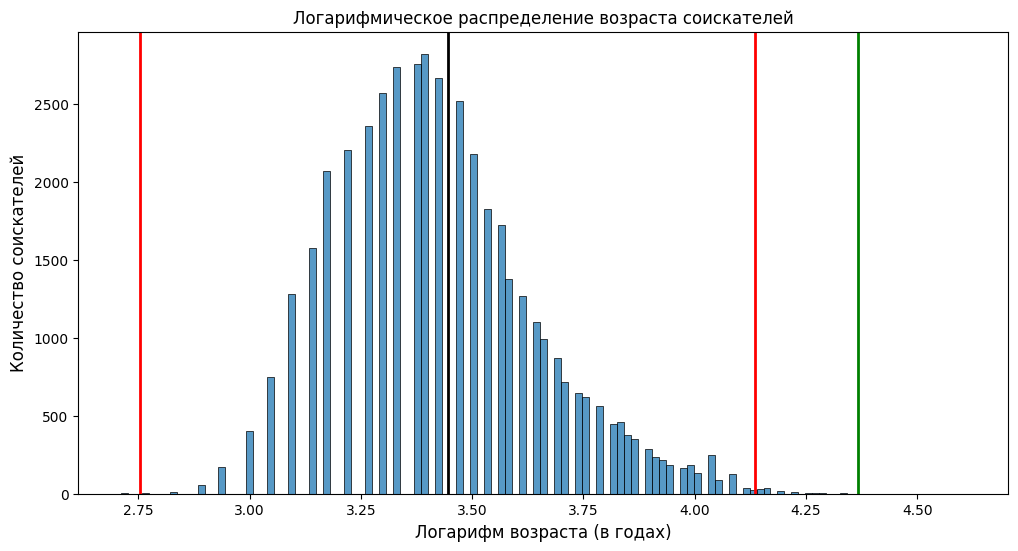

31137     15
32950     15
33654    100
Name: Возраст, dtype: int64

С помощью метода z-отклонений найдено 3 выброса


In [27]:
# Переводим признак "Возраст" в логарифмический масштаб
log_age = round(np.log(hh_data['Возраст']), 2)

# Установка размера графика
plt.figure(figsize=(12, 6))

# Построение распределения
histplot = sns.histplot(log_age)
mean_log_age = log_age.mean()
std_log_age = log_age.std()

# Добавление линий (среднего, для интервалов трёх сигм и "послабление в право" +1 сигма)
histplot.axvline(mean_log_age, color='k', lw=2)
histplot.axvline(mean_log_age + 3 * std_log_age, color='r', lw=2)
histplot.axvline(mean_log_age - 3 * std_log_age, color='r', lw=2)
histplot.axvline(mean_log_age + 4 * std_log_age, color='g', lw=2)

# Подписываем график и названия осей
histplot.set_title('Логарифмическое распределение возраста соискателей')
histplot.set_xlabel('Логарифм возраста (в годах)', fontsize=12)
histplot.set_ylabel('Количество соискателей', fontsize=12)

# Отображаем график
plt.show()

# Поиск выбросов
z_scores = (log_age - mean_log_age) / std_log_age
outliers = hh_data[(z_scores > 4) | (z_scores < -3)]

# Выводим таблицу с выбросами
display(outliers['Возраст'])

# Отвечаем на вопрос
print(f'С помощью метода z-отклонений найдено {outliers["Возраст"].count()} выброса')

# Удаление выбросов
hh_data = hh_data.drop(hh_data[(z_scores < -3) | (z_scores > 4)].index)


Вывод:

На графике видна небольшая асимметрией вправо. Это было предсказуемо учитывая, что в базе данных сравнительно небольшое число соискателей престарелого возраста.